In [2]:
import pandas as pd

In [3]:
orders_df = pd.read_csv(r"C:\Users\RAKESH\Downloads\orders.csv")
users_df = pd.read_json(r"C:\Users\RAKESH\Downloads\users.json")
restaurants_df = pd.read_csv(r"C:\Users\RAKESH\Downloads\restaurants.csv")

In [150]:
orders_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [151]:
users_df

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


In [152]:
restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [5]:
df = pd.merge(left=pd.merge(left=orders_df, right=users_df, how='left', on='user_id'), right=restaurants_df, how='left', on='restaurant_id')
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [153]:
df.shape

(10000, 12)

In [6]:
df.to_csv(r"C:\Users\RAKESH\OneDrive\Documents\Innomatics_Data Science\Internship\Eligibility_Test\final_food_delivery_dataset.csv")

In [7]:
df.dtypes

order_id               int64
user_id                int64
restaurant_id          int64
order_date            object
total_amount         float64
restaurant_name_x     object
name                  object
city                  object
membership            object
restaurant_name_y     object
cuisine               object
rating               float64
dtype: object

In [9]:
df = df.astype({
    'order_date': 'datetime64[ns]'
})

In [11]:
df.dtypes

order_id                      int64
user_id                       int64
restaurant_id                 int64
order_date           datetime64[ns]
total_amount                float64
restaurant_name_x            object
name                         object
city                         object
membership                   object
restaurant_name_y            object
cuisine                      object
rating                      float64
dtype: object

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='membership', ylabel='total_amount'>

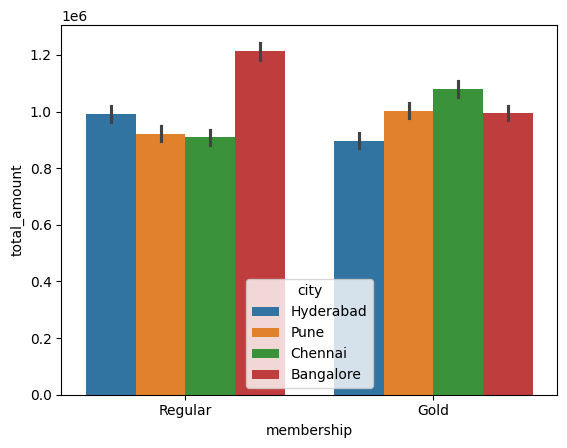

In [34]:
sns.barplot(df, x='membership', y='total_amount', hue='city', estimator='sum')

In [32]:
df.groupby(by=['membership', 'city'])['total_amount'].agg(['sum']).sort_values(by=['sum'], ascending=False)

sum
membership city                 
Regular    Bangalore  1212243.99
Gold       Chennai    1080909.79
           Pune       1003012.32
           Bangalore   994702.59
Regular    Hyderabad   992626.39
           Pune        921785.61
           Chennai     909603.24
Gold       Hyderabad   896740.19

<Axes: xlabel='cuisine', ylabel='total_amount'>

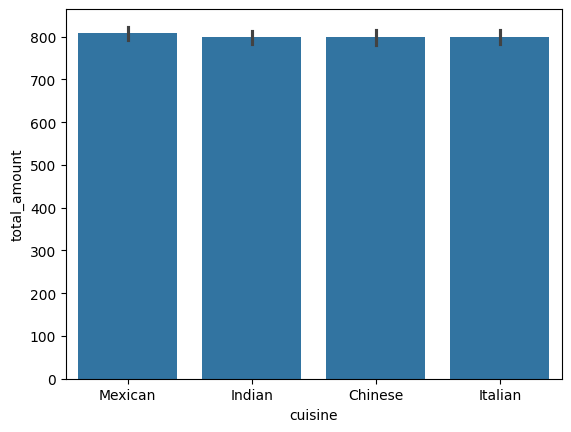

In [35]:
sns.barplot(df, x='cuisine', y='total_amount', estimator='mean')

In [41]:
h = df.groupby(by=['name'])['total_amount'].agg(['sum'])
len(h[h['sum']>1000])

2544

In [42]:
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-04-10,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [49]:
df.groupby(by=['restaurant_name_x'])['total_amount'].agg(['sum']).sort_values(by='sum', ascending=False)

,sum
restaurant_name_x,
Spice Foods Non-Veg,48616.39
Annapurna Kitchen North Indian,46462.08
Swagath Cafe Multicuisine,45821.74
Hotel Curry House North Indian,45091.67
Amma Biryani North Indian,44169.33
...,...
Sri Restaurant Andhra,8376.52
Darbar Restaurant Punjabi,8259.62
Ruchi Tiffins Pure Veg,7620.96


In [46]:
df[df['restaurant_name_x']=='Spice Foods Non-Veg']['rating'].min(), df[df['restaurant_name_x']=='Spice Foods Non-Veg']['rating'].max()

(np.float64(4.5), np.float64(4.8))

<Axes: xlabel='membership', ylabel='total_amount'>

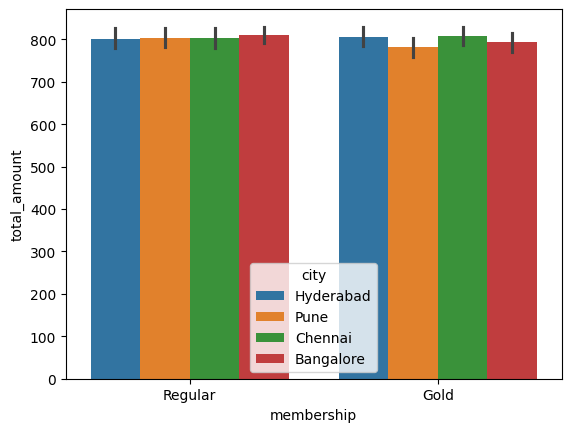

In [51]:
sns.barplot(df, x='membership', y='total_amount', hue='city', estimator='mean')

In [53]:
df.groupby(by=['membership', 'city'])['total_amount'].agg(['mean']).sort_values(by=['mean'], ascending=False)

mean
membership city                 
Regular    Bangalore  809.782224
Gold       Chennai    808.459080
           Hyderabad  806.421034
Regular    Pune       804.350445
           Chennai    803.536431
           Hyderabad  801.798376
Gold       Bangalore  793.223756
           Pune       781.162243

In [54]:
df

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-04-10,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,2023-05-21,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold,Restaurant_249,Italian,4.7
9996,9997,2867,267,2023-06-08,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular,Restaurant_267,Chinese,4.2
9997,9998,522,420,2023-11-11,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold,Restaurant_420,Italian,4.0
9998,9999,319,492,2023-08-09,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold,Restaurant_492,Italian,4.0


In [82]:
df.groupby(by=["cuisine"]).agg(
    distinct_restaurants=("restaurant_id", "nunique"),
    total_revenue=("total_amount", "sum")
)

,distinct_restaurants,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [96]:
df.groupby(by=['membership']).agg(total_orders=('order_id', 'nunique')).reset_index()

,membership,total_orders
0,Gold,4987
1,Regular,5013


In [106]:
temp = df.groupby(by=['restaurant_name_x']).agg(avg_amount=('total_amount', 'mean'),
                                        total_orders=('order_id', 'nunique'))
temp[temp['total_orders']<20].sort_values(by=['avg_amount'], ascending=False)

,avg_amount,total_orders
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19
...,...,...
Annapurna Tiffins Punjabi,621.828947,19
Darbar Tiffins Non-Veg,596.815556,18
Darbar Restaurant Punjabi,589.972857,14


In [114]:
df.groupby(by=['membership', 'cuisine'])['total_amount'].agg(['sum']).sort_values(by='sum', ascending=False)

sum
membership cuisine            
Regular    Mexican  1072943.30
           Italian  1018424.75
Gold       Mexican  1012559.79
           Italian  1005779.05
Regular    Indian    992100.27
Gold       Indian    979312.31
           Chinese   977713.74
Regular    Chinese   952790.91

<Axes: xlabel='order_date', ylabel='total_amount'>

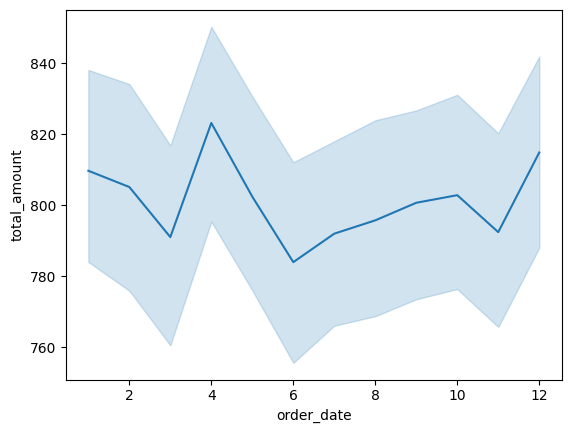

In [118]:
sns.lineplot(x=df['order_date'].dt.month, y=df['total_amount'])

In [141]:
df.groupby(by=['membership'])['total_amount'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
membership,
Regular,805.158434
Gold,797.145556


In [142]:
round(797.145556, 2)

797.15

In [144]:
df[df['rating']>=4.5]

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
3,4,319,224,2023-04-10,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
5,6,2933,499,2023-12-07,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9
10,11,924,235,2023-10-12,523.82,Amma Delights Family Restaurant,User_924,Chennai,Regular,Restaurant_235,Italian,4.5
17,18,1617,414,2023-04-23,736.89,Darbar Delights South Indian,User_1617,Pune,Gold,Restaurant_414,Chinese,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,1512,238,2023-08-21,239.32,New Foods South Indian,User_1512,Chennai,Gold,Restaurant_238,Chinese,4.7
9986,9987,923,285,2023-03-15,978.25,Ruchi Eatery North Indian,User_923,Chennai,Gold,Restaurant_285,Mexican,4.8
9987,9988,2677,239,2023-05-04,1174.89,Sai Curry House North Indian,User_2677,Pune,Regular,Restaurant_239,Indian,4.9
9994,9995,1257,328,2023-12-11,137.96,Ruchi Curry House Andhra,User_1257,Bangalore,Gold,Restaurant_328,Mexican,4.6


In [149]:
df.groupby(by=['membership', 'city']).agg(total_revenue=('total_amount', 'sum'),
                                          total_order=('order_id', 'nunique')).sort_values(by=['total_revenue'], ascending=False)

total_revenue  total_order
membership city                                 
Regular    Bangalore     1212243.99         1497
Gold       Chennai       1080909.79         1337
           Pune          1003012.32         1284
           Bangalore      994702.59         1254
Regular    Hyderabad      992626.39         1238
           Pune           921785.61         1146
           Chennai        909603.24         1132
Gold       Hyderabad      896740.19         1112